# Analise de Dados sobre a pandemia de covid-19 no Brasil 

# Objetivo do Notebook 

Este notebook tem como objetivo extrair dados relevantes sobre a Pandemia de Covid-19 no Brasil, e transforma-los
em informações que nos ajudem a compreender melhor o atual período.

Para a Análise desse DataSet foram adotados os seguintes critérios:

 - **0.1** - Média Movel : Média de Casos e Óbitos nos ultimos 7 dias

 - **0.2** - Variação de Casos e Óbitos : Variação percentual da Média móvel nos ultimos 14 dias

<hr> </hr>
 
 - **- Objetivos do Notebook**:
 
 - **1** - Obter o número total de Casos e Mortes Confirmadas por covid-19 no Brasil 

 - **2** - Obter o número total de casos e Óbitos confirmados para cada Unidade Federativa Brasileira 

 - **3** - Evolução Diária da Pandemia sobre o Brasil 

 - **4** - Filtrar os dias com mais casos e Óbitos confirmados por Covid-19 no Brasil 

 - **5** - Filtrar os meses com mais casos e Óbitos confirmados por Covid-19 no Brasil 

 - **6** - Calcular o coeficiente de correlação de Pearson 

 - **7** - Calcular a  Média Móvel de Casos e Óbitos por Covid-19 

 - **8** - Calcular a variação percentual de casos e óbitos da Pandemia no Brasil 

 - **9** - Plotar os gráficos das regiões mapeadas com os maiores índices de casos e óbitos

# Importando as Bibliotecas

In [23]:
import datetime
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
from IPython.display import Image
import json

In [3]:
# Aumenta a largura da célula do notebook Jupyter 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Lê o DataSet

In [4]:
covid = pd.read_csv('covid.csv.gz', index_col='date', parse_dates=True)
covid.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


# Estatisticas descritivas do DataSet 

In [5]:
# Obtém informações descrítivas do conjunto de Dados
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1578762 entries, 2020-03-17 to 2021-02-15
Data columns (total 17 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   city                                           1569582 non-null  object 
 1   city_ibge_code                                 1572813 non-null  float64
 2   epidemiological_week                           1578762 non-null  int64  
 3   estimated_population                           1572813 non-null  float64
 4   estimated_population_2019                      1572813 non-null  float64
 5   is_last                                        1578762 non-null  bool   
 6   is_repeated                                    1578762 non-null  bool   
 7   last_available_confirmed                       1578762 non-null  int64  
 8   last_available_confirmed_per_100k_inhabitants  1557294 non-null  float64
 9   last_avai

In [6]:
# Obtém informações estatísticas do conjunto de dados
covid.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,1.572813e+06,1.578762e+06,1.572813e+06,1.572813e+06,1.578762e+06,1.557294e+06,1.578762e+06,1.578762e+06,1.578762e+06,1.578762e+06,1.578762e+06
mean,3.214680e+06,2.020468e+05,8.909773e+04,8.841575e+04,1.638848e+03,1.789959e+03,3.076949e-02,4.689457e+01,1.426584e+02,1.247223e+01,3.034074e-01
std,1.011420e+06,2.621093e+01,9.638946e+05,9.569284e+05,2.009248e+04,1.980630e+03,7.499062e-02,6.595041e+02,8.377405e+01,1.676458e+02,4.615153e+00
min,1.100000e+01,2.020090e+05,7.760000e+02,7.810000e+02,0.000000e+00,2.160000e-03,0.000000e+00,0.000000e+00,1.000000e+00,-7.741000e+03,-1.870000e+02
25%,2.507002e+06,2.020300e+05,5.832000e+03,5.833000e+03,2.800000e+01,3.308075e+02,0.000000e+00,0.000000e+00,7.100000e+01,0.000000e+00,0.000000e+00
50%,3.142908e+06,2.020400e+05,1.276500e+04,1.272300e+04,1.230000e+02,1.196854e+03,1.670000e-02,2.000000e+00,1.410000e+02,0.000000e+00,0.000000e+00
75%,4.115606e+06,2.020500e+05,2.834600e+04,2.822000e+04,4.410000e+02,2.573187e+03,3.210000e-02,9.000000e+00,2.120000e+02,2.000000e+00,0.000000e+00
max,5.300108e+06,2.021070e+05,4.628933e+07,4.591905e+07,1.915914e+06,3.269658e+04,1.000000e+00,5.630400e+04,3.570000e+02,3.243600e+04,4.550000e+02


In [7]:
# Filtra as linhas correspondentes aos estados no DataSet
covid_estados = covid[covid.place_type == 'state']
covid_estados.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,NaN,12.0,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0,0,3,state,AC,1,0
2020-03-20,NaN,12.0,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0,0,4,state,AC,3,0
2020-03-21,NaN,12.0,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0,0,5,state,AC,4,0


In [8]:
# Calcula o numero total de casos e mortes confirmadas por covid-19 no Brasil
casos_total = covid_estados.new_confirmed.sum()
mortes_total = covid_estados.new_deaths.sum()
print(f'Total de Casos confirmados de Covid-19 no Brasil até {covid.index[-1]}: {casos_total}')
print(f'Total de Mortes confirmadas por Covid-19 no Brasil até {covid.index[-1]}: {mortes_total}')

Total de Casos confirmados de Covid-19 no Brasil até 2021-02-15 00:00:00: 9872205
Total de Mortes confirmadas por Covid-19 no Brasil até 2021-02-15 00:00:00: 239991


In [9]:
# Filtra os Estados com os maiores indices de casos confirmados de covid-19 no Brasil
casos_por_estado = covid_estados.groupby('state')[['new_confirmed', 'new_deaths']].sum()
casos_por_estado = casos_por_estado.sort_values(by='new_confirmed', ascending=False)
casos_por_estado

,new_confirmed,new_deaths
state,,
SP,1915914,56304
MG,808693,16887
BA,631645,10798
SC,615441,6746
PR,589494,10765
RS,586315,11387
RJ,555541,31512
CE,396495,10836
GO,373530,8027


In [10]:
# Filtra os Estados com os maiores indices de óbitos confirmados por covid-19 no Brasil
obitos_por_estado = covid_estados.groupby('state')[['new_confirmed', 'new_deaths']].sum()
obitos_por_estado = obitos_por_estado.sort_values(by='new_deaths', ascending=False)
obitos_por_estado

,new_confirmed,new_deaths
state,,
SP,1915914,56304
RJ,555541,31512
MG,808693,16887
RS,586315,11387
CE,396495,10836
BA,631645,10798
PR,589494,10765
PE,281331,10677
AM,295879,9992


# Evolução Diária da Pandemia no Brasil

In [11]:
# Agrupa o numero total de casos e óbitos confirmados por covid-19 por dia
evolucao_diaria = covid_estados.groupby(covid_estados.index)[['new_confirmed', 'new_deaths']].sum()
evolucao_diaria.head()

,new_confirmed,new_deaths
date,,
2020-02-25,1,0
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0


Como podemos observar no DataSet o primeiro caso confirmado de covid-19 no Brasil foi no dia 25 de fevereiro de 2020

https://saude.abril.com.br/medicina/coronavirus-primeiro-caso-brasil/

# Média Móvel de Casos e Óbitos de covid-19

In [12]:
# Cria 2 colunas e calcula a média móvel de casos e óbitos de covid-19 no Brasil
evolucao_diaria['media_movel_casos'] = evolucao_diaria.new_confirmed.rolling(window=8).mean()
evolucao_diaria['media_movel_obitos'] = evolucao_diaria.new_deaths.rolling(window=8).mean()
evolucao_diaria.tail()

,new_confirmed,new_deaths,media_movel_casos,media_movel_obitos
date,,,,
2021-02-11,53604,1442,46973.000,1099.125
2021-02-12,48942,1219,45952.375,1091.875
2021-02-13,44856,1026,45098.125,1063.750
2021-02-14,30723,653,43149.750,1028.250
2021-02-15,24197,570,42904.125,1038.375


# Variação de Casos e Óbitos de covid-19 no Brasil

In [47]:
# Cria 2 colunas e calcula a variação percentual da média móvel de covid-19 no Brasil
evolucao_diaria['variacao_casos'] = evolucao_diaria.new_confirmed.rolling(window=15).mean().pct_change() * 100
evolucao_diaria['variacao_obitos'] = evolucao_diaria.new_deaths.rolling(window=15).mean().pct_change() * 100

In [48]:
# Substituiu alguns valores e preenche os valores ausentes por 0
evolucao_diaria.variacao_casos = evolucao_diaria.variacao_casos.replace([np.inf, -np.inf], np.nan)
evolucao_diaria.variacao_obitos = evolucao_diaria.variacao_obitos.replace([np.inf, -np.inf], np.nan)
evolucao_diaria = evolucao_diaria.fillna(value=0)
evolucao_diaria.tail()

,new_confirmed,new_deaths,media_movel_casos,media_movel_obitos,variacao_casos,variacao_obitos
date,,,,,,
2021-02-11,53604,1442,46973.000,1099.125,-1.535308,0.660272
2021-02-12,48942,1219,45952.375,1091.875,-1.649999,-1.355198
2021-02-13,44856,1026,45098.125,1063.750,-2.079285,-0.382661
2021-02-14,30723,653,43149.750,1028.250,-3.246117,-3.387909
2021-02-15,24197,570,42904.125,1038.375,-0.554850,0.019554


In [49]:
# Filtra os 10 dias com os maiores indices de casos confirmados por covid-19 
dia_com_mais_casos = evolucao_diaria.nlargest(10, 'new_confirmed')
dia_com_mais_casos

,new_confirmed,new_deaths,media_movel_casos,media_movel_obitos,variacao_casos,variacao_obitos
date,,,,,,
2021-01-07,89769,1517,42943.625,827.750,7.966997,5.134406
2021-01-15,69097,1135,54053.750,968.750,2.069369,0.898995
2020-12-17,68699,1061,47586.000,731.625,3.090479,3.851168
2021-01-14,68329,1154,56637.750,1016.500,1.833746,-0.473684
2020-07-22,66150,1296,37930.375,1079.375,3.596755,-0.031227
2020-12-16,66124,941,45822.500,705.500,2.208329,2.635100
2021-01-27,64772,1336,52969.875,1091.750,0.344932,1.374525
2021-01-20,64477,1395,55636.250,1018.625,0.777923,1.383665
2021-01-13,62244,1264,55685.000,1026.125,0.853286,1.627569


Neste Dataset temos os 10 dias com os maiores indices de casos por covid-19 no Brasil 

In [50]:
# Filtra os 10 dias com os maiores indices de obitos confirmados por covid-19 no Brasil
dia_com_mais_obitos = evolucao_diaria.nlargest(10, 'new_deaths')
dia_com_mais_obitos

,new_confirmed,new_deaths,media_movel_casos,media_movel_obitos,variacao_casos,variacao_obitos
date,,,,,,
2021-01-07,89769,1517,42943.625,827.750,7.966997,5.134406
2020-06-04,31952,1485,25704.250,1055.875,3.749797,3.426066
2021-02-11,53604,1442,46973.000,1099.125,-1.535308,0.660272
2021-01-28,60760,1438,52505.250,1097.125,-0.184492,1.123450
2020-06-23,39566,1407,32587.125,1082.625,5.298473,3.647579
2021-01-20,64477,1395,55636.250,1018.625,0.777923,1.383665
2020-06-02,31907,1368,23015.500,985.375,6.008715,4.631761
2020-08-05,56138,1367,45612.875,1060.250,1.337500,0.316336
2021-02-10,61108,1361,47074.250,1068.625,-0.068690,1.299849


In [14]:
# Meses com os maiores casos por covid-19 no Brasil
mes_com_mais_casos = evolucao_diaria.reset_index().copy()
mes_com_mais_casos['date'] = pd.to_datetime(mes_com_mais_casos['date']).dt.to_period('M')
mes_com_mais_casos = mes_com_mais_casos.groupby('date')[['new_confirmed']].sum()
mes_com_mais_casos = mes_com_mais_casos.sort_values(by='new_confirmed', ascending=False)
mes_com_mais_casos.index = mes_com_mais_casos.index.astype('datetime64[ns]')
mes_com_mais_casos

,new_confirmed
date,
2021-01-01,1527489
2020-12-01,1339067
2020-07-01,1257787
2020-08-01,1244378
2020-09-01,902536
2020-06-01,896570
2020-11-01,804202
2020-10-01,720398
2021-02-01,663684


In [15]:
# Meses com os maiores indices de obitos por covid-19 no Brasil 
mes_com_mais_obitos = evolucao_diaria.reset_index().copy()
mes_com_mais_obitos['date'] =  pd.to_datetime(mes_com_mais_obitos['date']).dt.to_period('M')
mes_com_mais_obitos = mes_com_mais_obitos.groupby('date')[['new_deaths']].sum()
mes_com_mais_obitos = mes_com_mais_obitos.sort_values(by='new_deaths', ascending=False)
mes_com_mais_obitos.index = mes_com_mais_obitos.index.astype('datetime64[ns]')
mes_com_mais_obitos

,new_deaths
date,
2020-07-01,32936
2020-06-01,30424
2021-01-01,29574
2020-08-01,28891
2020-05-01,23387
2020-09-01,22346
2020-12-01,21804
2020-10-01,16008
2021-02-01,15345


# Calculando o Coeficiente de correlação de Pearson 

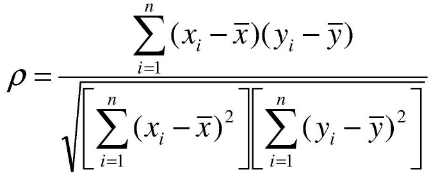

In [271]:
# Calcula o coeficiente de correlação de Pearson para as variaveis Obitos e Média Móvel de Obitos
from IPython.display import Image
Image(filename='pearson.png')

O coeficiente de Correlação de Pearson nos informa que a variável óbitos possui uma relação de dependência óbvia em relação com a média móvel de óbitos

In [51]:
correlacao = evolucao_diaria.new_deaths.corr(evolucao_diaria.media_movel_obitos, method='spearman', min_periods=len(evolucao_diaria))
print(f'Coeficiente de correlação de Pearson:{correlacao}')

Coeficiente de correlação de Pearson:0.8666614962487049


# Visualizando os Dados

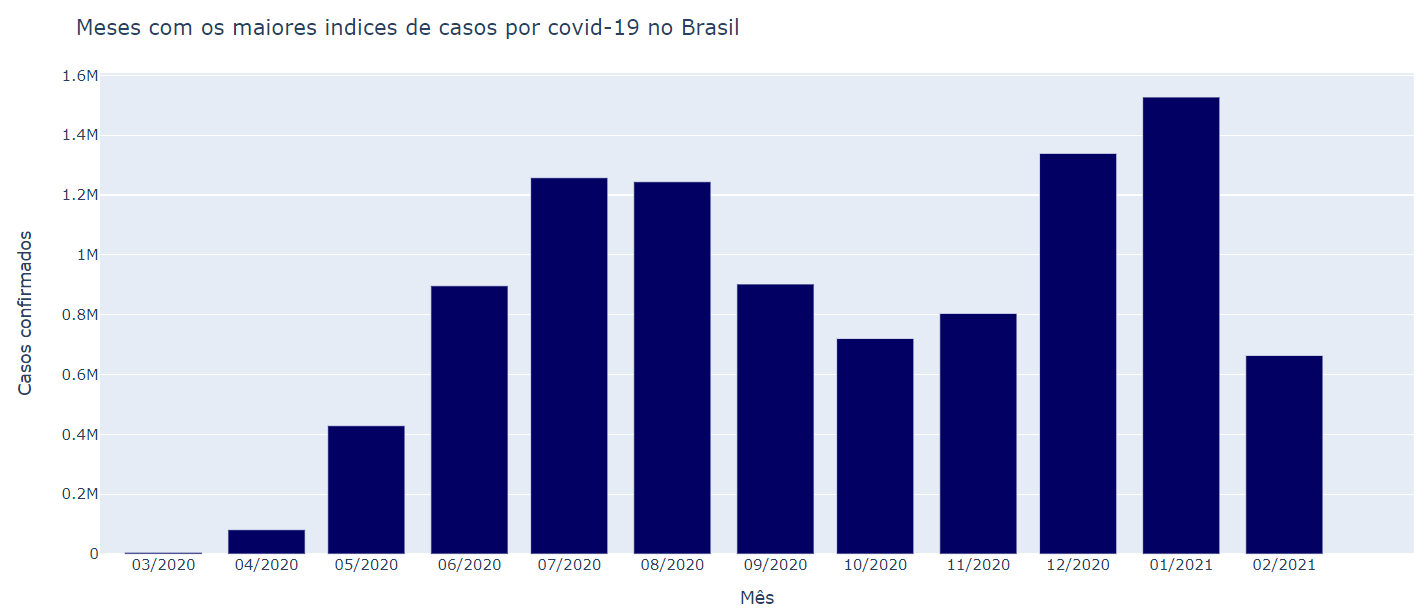

In [43]:
# Grafico de barras sobre os meses com maiores casos de covid-19 no Brasil 
meses = pd.DatetimeIndex(['2020-02-01', '2020-03-01','2020-04-01','2020-05-01','2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
                           '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01'])

fig = px.bar(mes_com_mais_casos, x=mes_com_mais_casos.index, y=mes_com_mais_casos.new_confirmed, labels={'date': 'Mês', 'new_confirmed': 'Casos confirmados'})

fig.update_layout(title='Meses com os maiores indices de casos por covid-19 no Brasil',
                  xaxis = dict(
                  tickmode = 'array',
                  tickvals = meses,
                  ticktext = ['02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020',
                              '10/2020','11/2020', '12/2020', '01/2021', '02/2021']))
                  

fig.update_traces(marker_color='rgb(2, 0, 98)')

Image(filename='casos.png')


Nesse grafico podemos perceber que Janeiro de 2021 foi o mês com o maior numero de casos por covid-19 no Brasil, periodo coincidente com as férias e aumento no número de aglomerações pelo País.

FONTE: https://www1.folha.uol.com.br/equilibrioesaude/2021/01/janeiro-e-o-mes-com-mais-casos-de-covid-19-no-brasil-seguido-por-dezembro.shtml

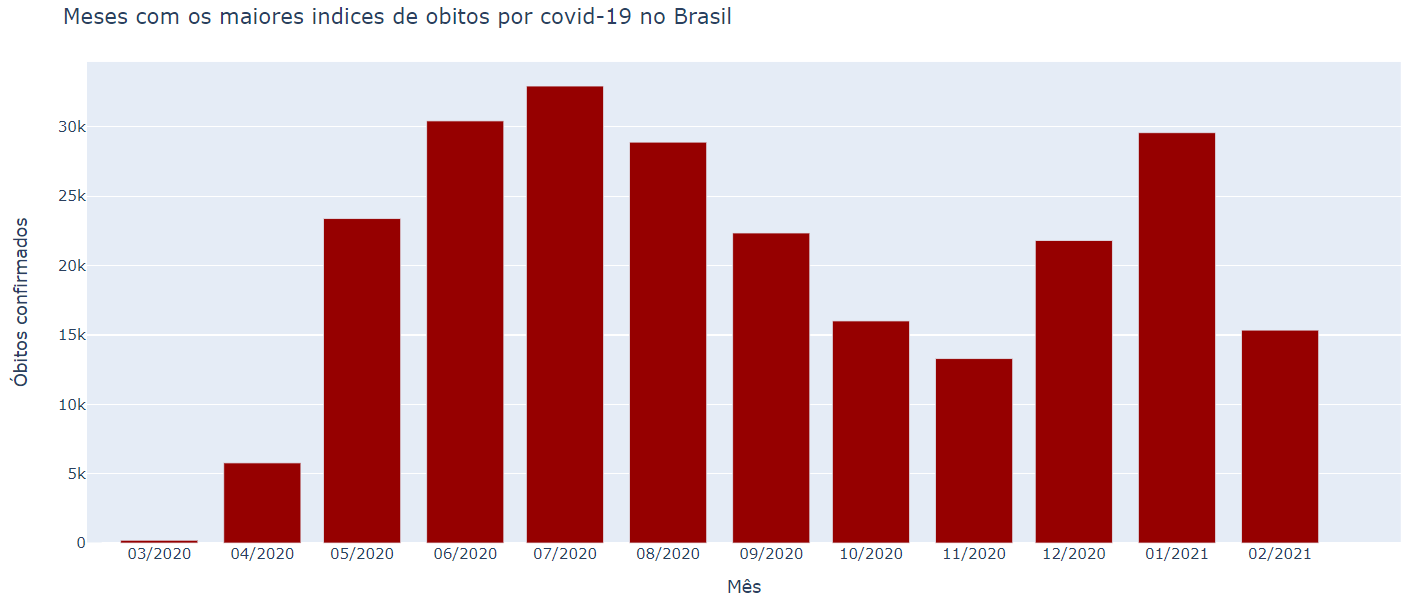

In [45]:
# Grafico de barras sobre os meses com os maiores indices de obitos no Brasil 
meses = pd.DatetimeIndex(['2020-02-01', '2020-03-01','2020-04-01','2020-05-01','2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
                           '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01'])

fig = px.bar(mes_com_mais_casos, x=mes_com_mais_obitos.index, y=mes_com_mais_obitos.new_deaths, labels={'x': 'Mês', 'y': 'Óbitos confirmados'})

fig.update_layout(title='Meses com os maiores indices de obitos por covid-19 no Brasil',
                  xaxis = dict(
                  tickmode = 'array',
                  tickvals = meses,
                  ticktext = ['02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020',
                              '10/2020','11/2020', '12/2020', '01/2021', '02/2021']))

fig.update_traces(marker_color='rgb(150, 0, 0)')

Image(filename='obitos.png')

Já neste gráfico podemos perceber que Julho de 2020 foi o mês com os maiores indíces de obitos confirmados por covid-19 no Brasil

FONTE: https://g1.globo.com/bemestar/coronavirus/noticia/2020/08/01/32912-vidas-perdidas-julho-foi-o-mes-com-mais-mortes-por-covid-19-no-brasil-apontam-secretarias-de-saude.ghtml


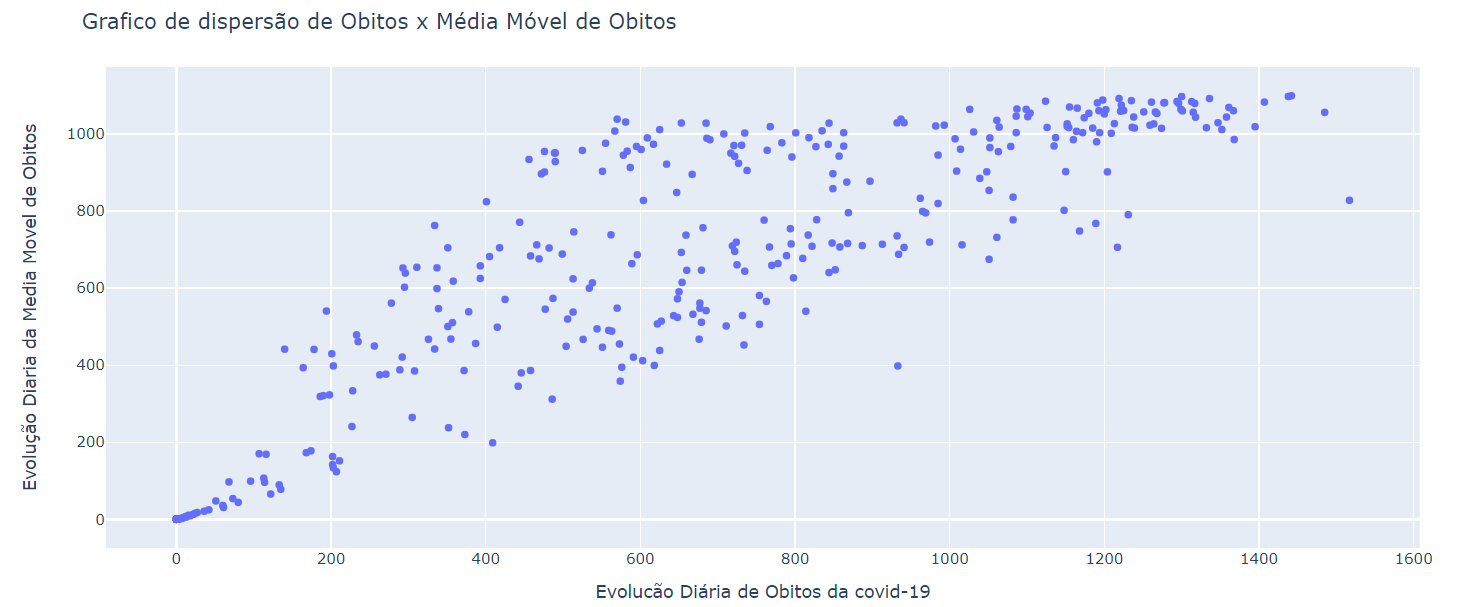

In [34]:
fig = px.scatter(x=evolucao_diaria.new_deaths, y=evolucao_diaria.media_movel_obitos, 
                 labels={'x': 'Evolucão Diária de Obitos da covid-19', 
                         'y': 'Evolução Diaria da Media Movel de Obitos'})

fig.update_layout(title='Grafico de dispersão de Obitos x Média Móvel de Obitos')
Image(filename='dispersao.png')

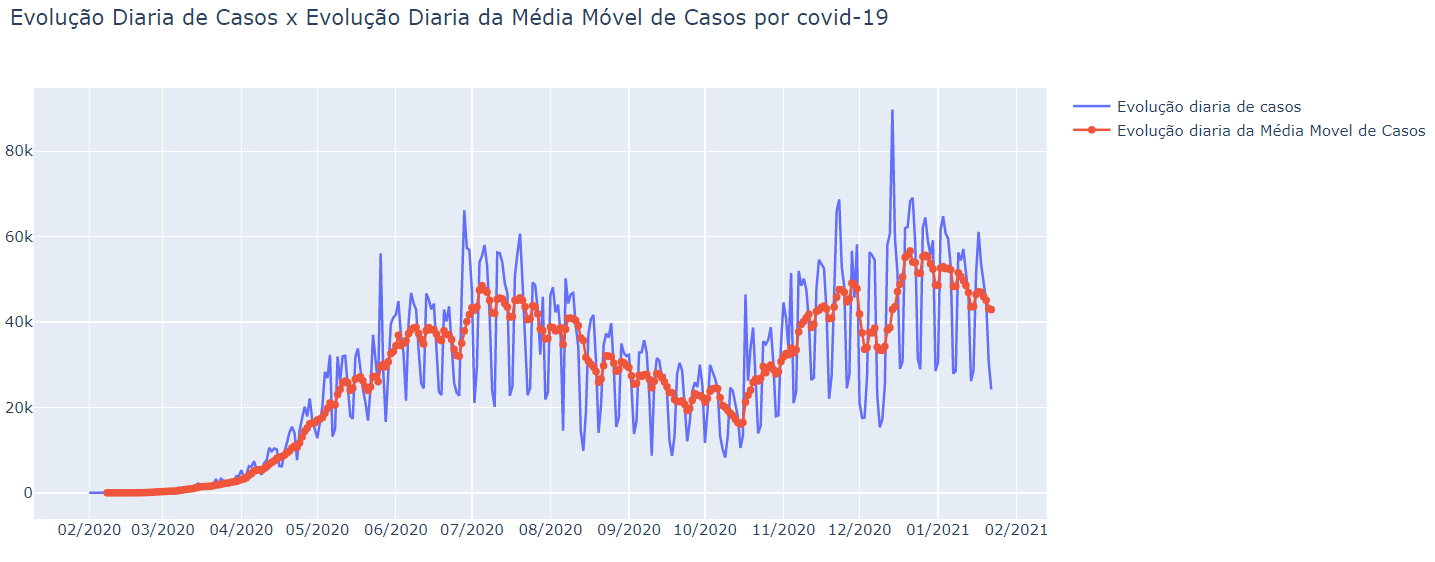

In [27]:
fig = go.Figure()

meses = pd.DatetimeIndex(['2020-02-25', '2020-03-25','2020-04-25','2020-05-25','2020-06-25', '2020-07-25', '2020-08-25', '2020-09-25',
                           '2020-10-25', '2020-11-25', '2020-12-25', '2021-01-25', '2021-02-25'])

fig.add_trace(go.Scatter(x=evolucao_diaria.index, y=evolucao_diaria.new_confirmed,
                    mode='lines',
                    name='Evolução diaria de casos'))

fig.add_trace(go.Scatter(x=evolucao_diaria.index, y=evolucao_diaria.media_movel_casos,
                    mode='lines+markers',
                    name='Evolução diaria da Média Movel de Casos'))

fig.update_layout(title='Evolução Diaria de Casos x Evolução Diaria da Média Móvel de Casos por covid-19',
                  xaxis = dict(
                  tickmode = 'array',
                  tickvals = meses,
                  ticktext = ['02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020',
                              '10/2020','11/2020', '12/2020', '01/2021', '02/2021']))
Image(filename='evolucao_diaria.png')

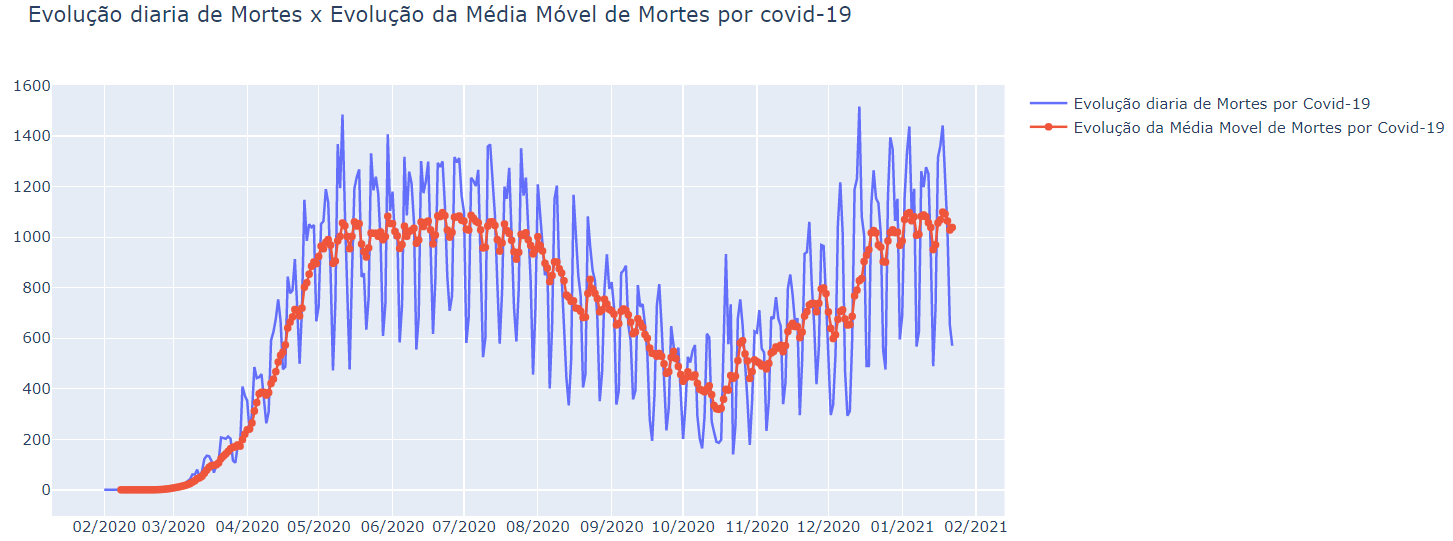

In [28]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=evolucao_diaria.index, y=evolucao_diaria.new_deaths,
                    mode='lines',
                    name='Evolução diaria de Mortes por Covid-19'))

fig.add_trace(go.Scatter(x=evolucao_diaria.index, y=evolucao_diaria.media_movel_obitos,
                    mode='lines+markers',
                    name='Evolução da Média Movel de Mortes por Covid-19'))

fig.update_layout(title='Evolução diaria de Mortes x Evolução da Média Móvel de Mortes por covid-19',
                  xaxis = dict(
                  tickmode = 'array',
                  tickvals = meses,
                  ticktext = ['02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020',
                              '10/2020','11/2020', '12/2020', '01/2021', '02/2021']))
Image(filename='evolucao_diaria1.png')

In [35]:
# Importa a localização dos Estados Brasileiros
br_estados = 'br_states.json'
geo_json_data = json.load(open(br_estados))

In [36]:
# Cria um mapa 
mapa1 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

# Cria um mapa 
mapa2 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

In [37]:
mapa1.choropleth(
    geo_data = geo_json_data,
    name = 'Casos de Covid-19 por UF',
    data = casos_por_estado,
    columns=[casos_por_estado.index, 'new_confirmed'],
    key_on = 'feature.id',
    fill_color='Reds',
    fill_opacity=0.8,
    line_color='black',
    line_opacity=0.5,
    show='png')

mapa2.choropleth(
    geo_data = geo_json_data,
    name = 'Obitos de Covid-19 por UF',
    data = obitos_por_estado,
    columns=[casos_por_estado.index, 'new_deaths'],
    key_on = 'feature.id',
    fill_color='Reds',
    fill_opacity=0.8,
    line_color='black',
    line_opacity=0.5,
    show='png')

C:\Users\vinic\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



# Estados com os maiores índices de casos confirmados por covid-19 no Brasil 

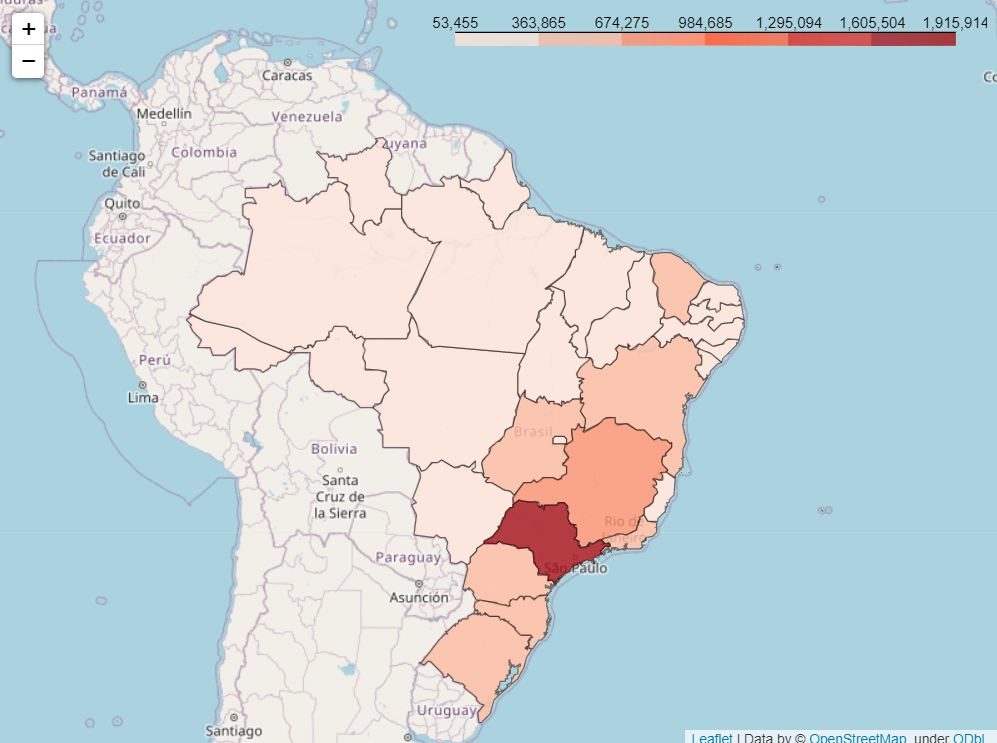

In [40]:
Image(filename='casos_por_estado.png')

# Estados com os maiores índices de óbitos confirmados por covid-19 no Brasil

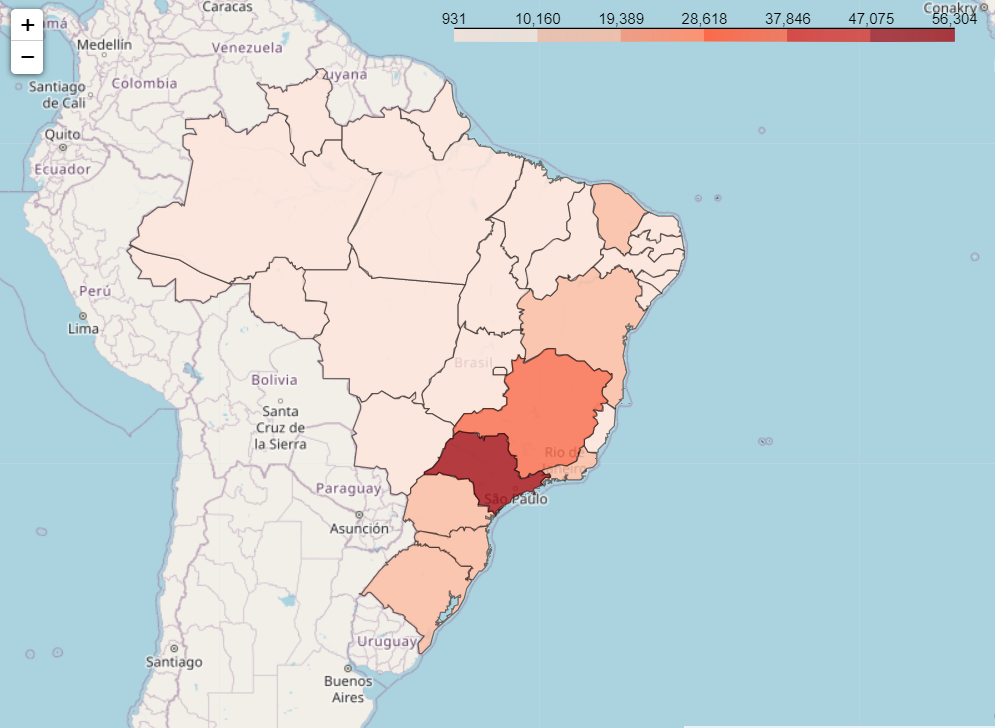

In [41]:
# Estados com os maiores indices de obitos por covid-19 no Brasil 
Image(filename='obitos_por_estado.png')

FONTE : https://brasil.io/dataset/covid19/files/

CONCLUSÃO: A partir dos dados contidos neste DataSet conseguimos extrair alguns dados e informações importantes sobre a pandemia de covid-19 no Brasil e mapear as regiões com os maiores indices de casos e obitos na pandemia 